## Author: Partha Ghosal


# Project: – KNearest Neighbor (KNN)

#### Data Description:

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### Domain: Banking

#### Context:

This case is about a bank (Thera Bank)whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#### Attribute Information:
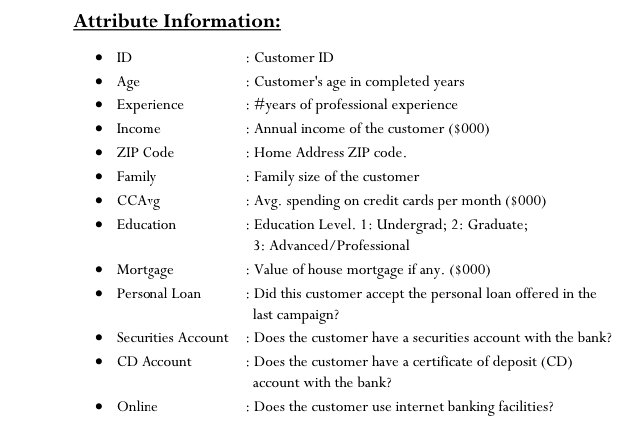

#### Learning Outcomes:

1. Exploratory Data Analysis
2. Preparing the data to train a model
3. Training and making predictions using a classification model
4. Model evaluation

#### Steps and tasks:

1. Read the column description and ensure you understand each attribute well.
2. Study the data distribution in each attribute, share your findings (15 marks)
3. Get the target column distribution. Your comments (5 marks)
4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)
7. Give your reasoning on which is the best model in this case and why it performs better? (5marks)

#### Dataset "Bank_Personal_Loan_Modelling"


### Project Execution Details


#### Importing necessary libraries for this modeling

In [38]:
#1. Importing the necessary libraries to execute the project

import numpy as np         #----for mathematical calculation
import pandas as pd        #----for dataset handling
import seaborn as sns      #----for making statistical graphics on top of matplotlib. 
from matplotlib import pyplot as plt  #-----for plotting required charts

# for enabling inline plotting
%matplotlib inline         
sns.set(style="ticks")

import warnings;

from sklearn.model_selection import train_test_split   #Import library for spliting the data
from sklearn.linear_model import LogisticRegression    #Importing Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc

from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer

from scipy import stats
from scipy.stats import zscore
##-----------------------------------------------------------------------
warnings.filterwarnings('ignore')

#### Loading the DataSet for the project

In [39]:
# 2. Reading the data as data frame
df = pd.read_csv("C:\\Users\\EPAAGHL\\Documents\\Personal\\Bank_Personal_Loan_Modelling.csv")

In [40]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### Perform basic EDA on dataset

In [41]:
#The shape of the data
df.shape

(5000, 14)

In [6]:
#Checking the data type of each attribute
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [42]:
#Checking the presence of missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Initial visual observation of the data

Experience column is having negative value, so there could be data quality issue with that columns. There are some values in the ZIP code which does not seem to be correct. 

### Visual analysis of the data

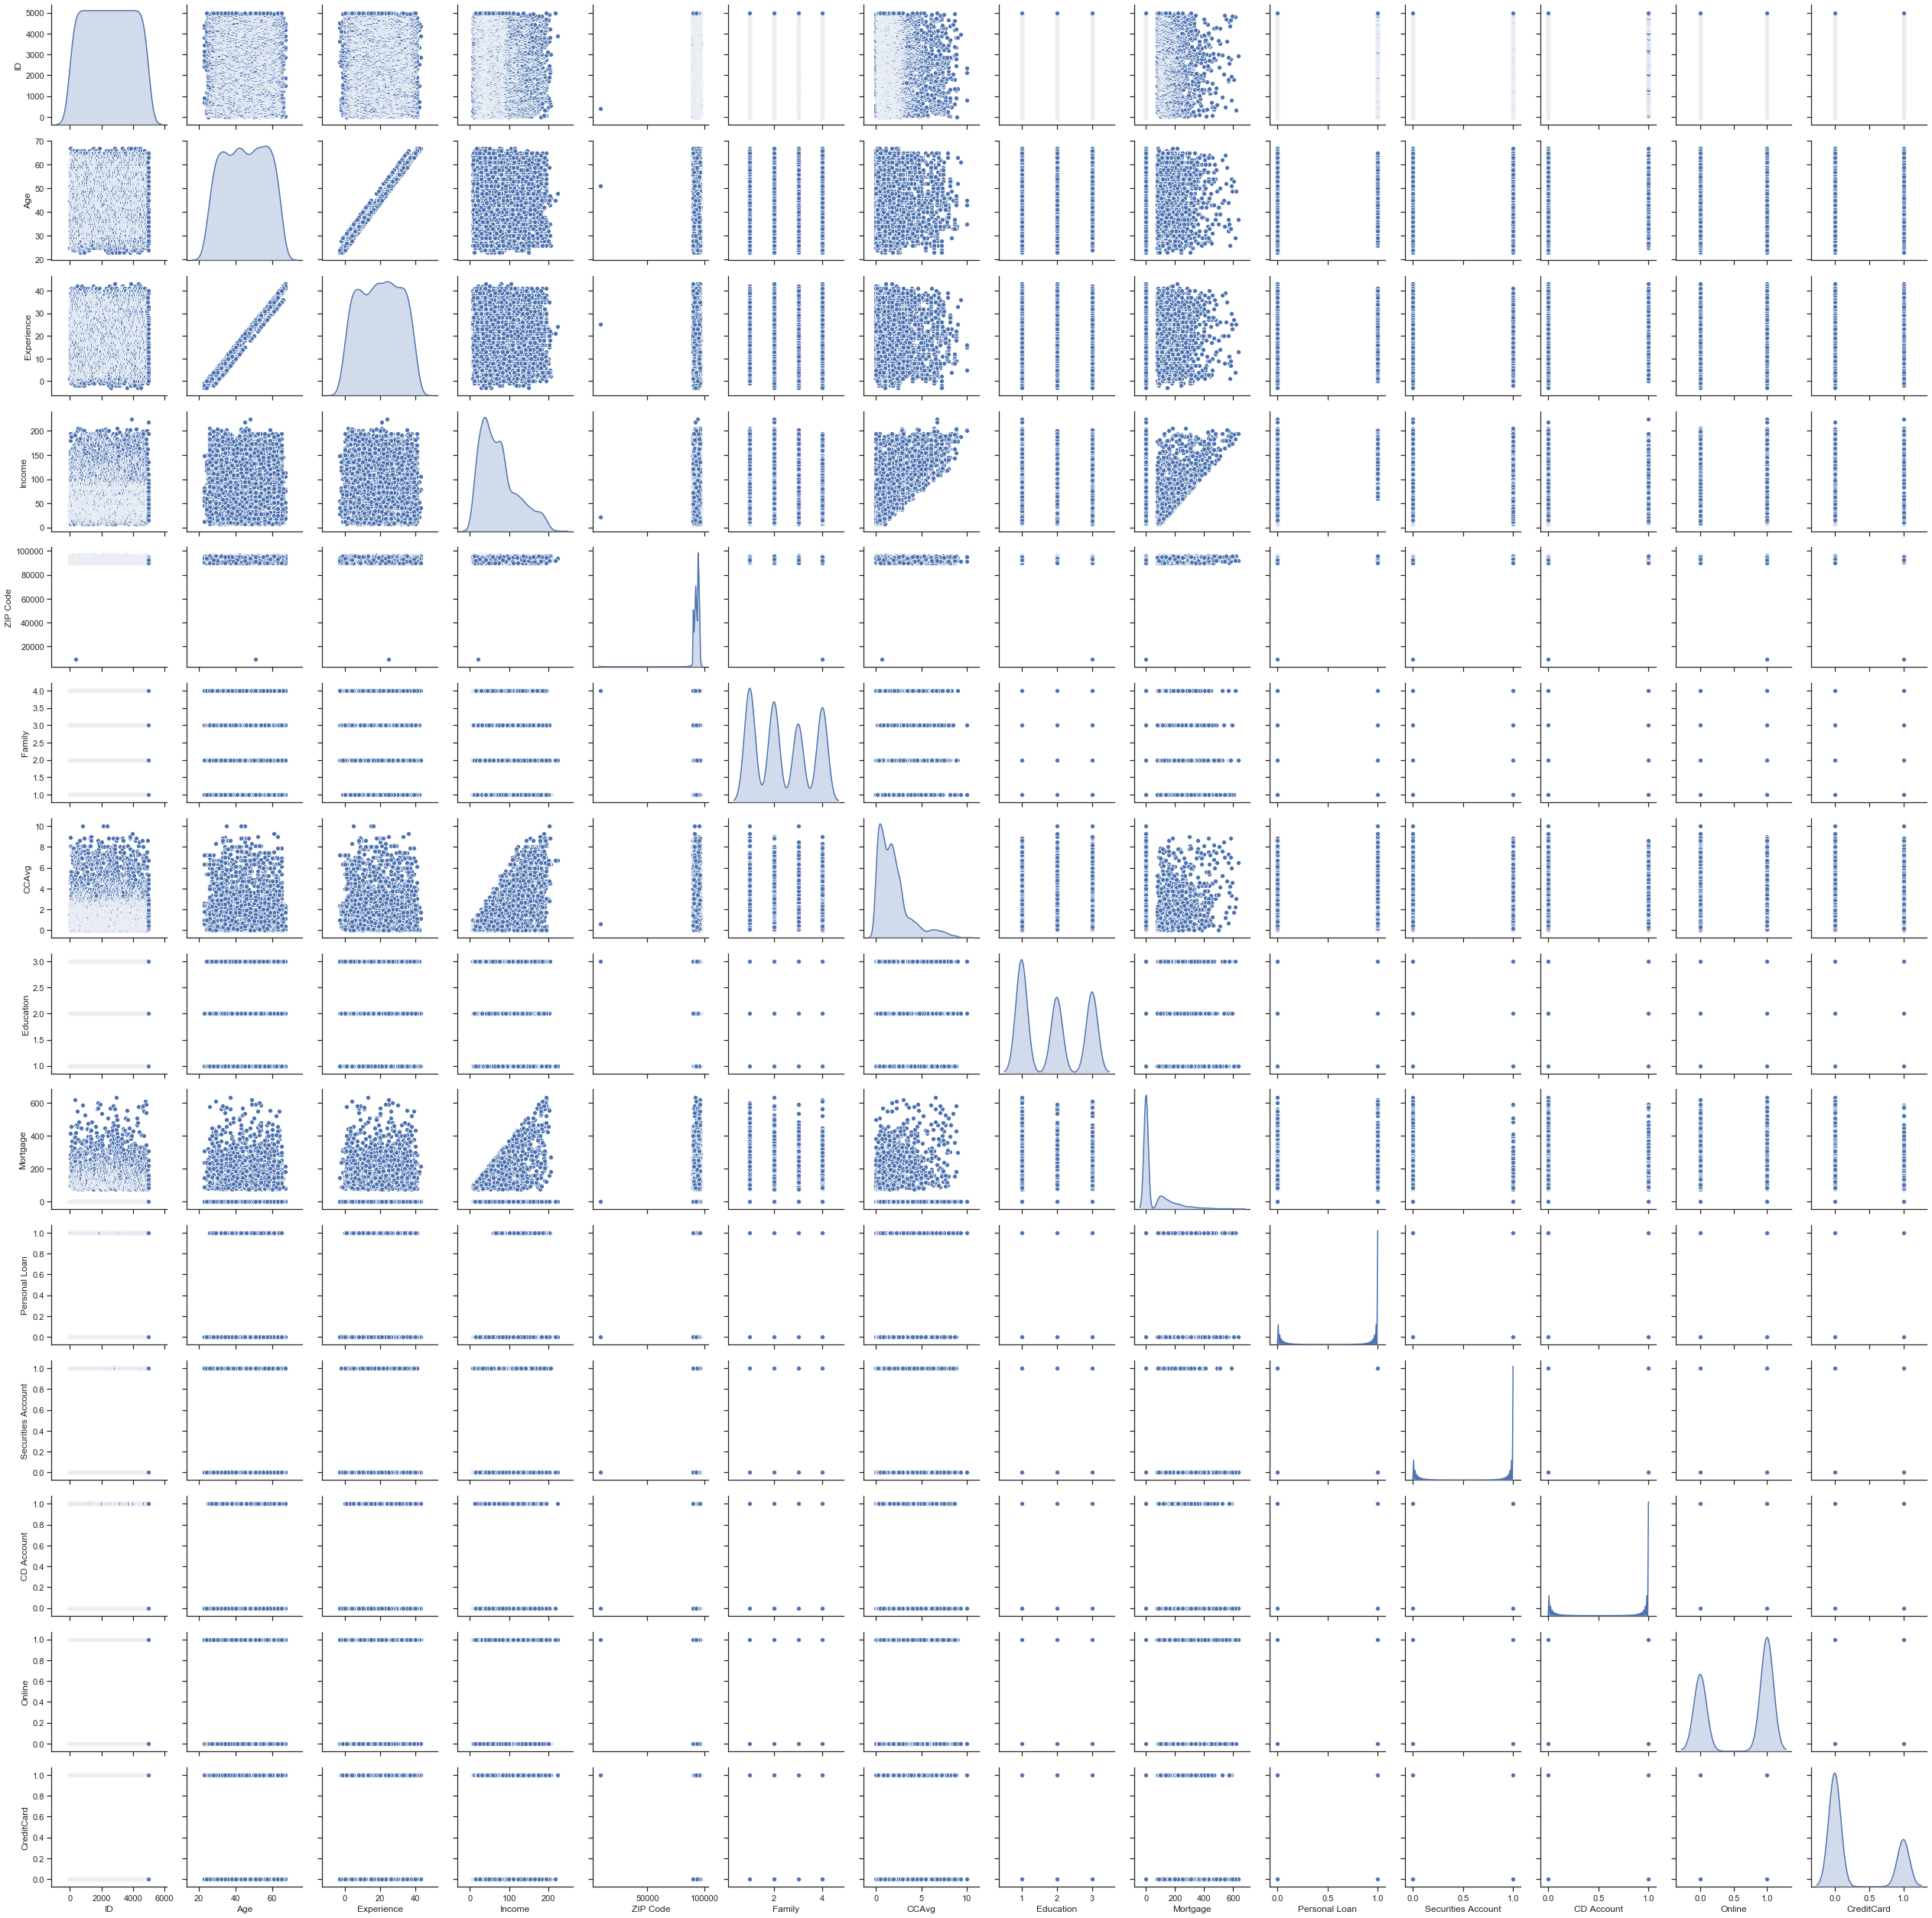

In [13]:

sns.pairplot(df, diag_kind ='kde')
plt.show()

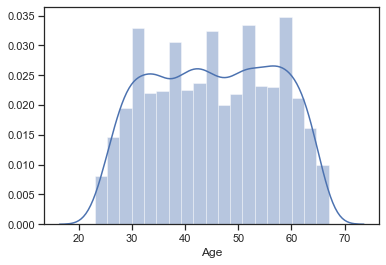

In [14]:
sns.distplot( df['Age'], color = 'b')

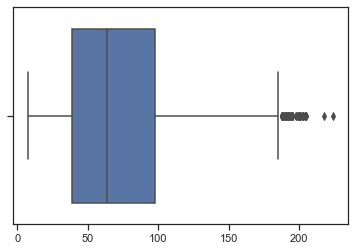

In [15]:
plt = sns.boxplot(df[['Income']])

#### Observation
Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 40K to 100K.

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### checking of effect of education and mortgage on personal loan, if any

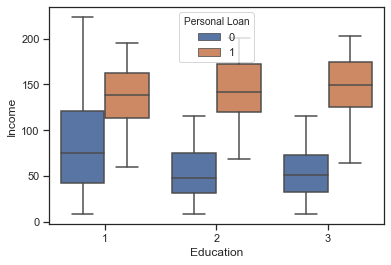

In [18]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=df)

#### Observation
The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans do not show significant influence of education.

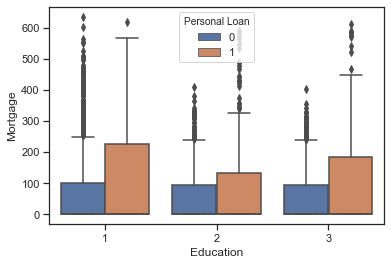

In [19]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

### Correlation comparison with heat map

In [44]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


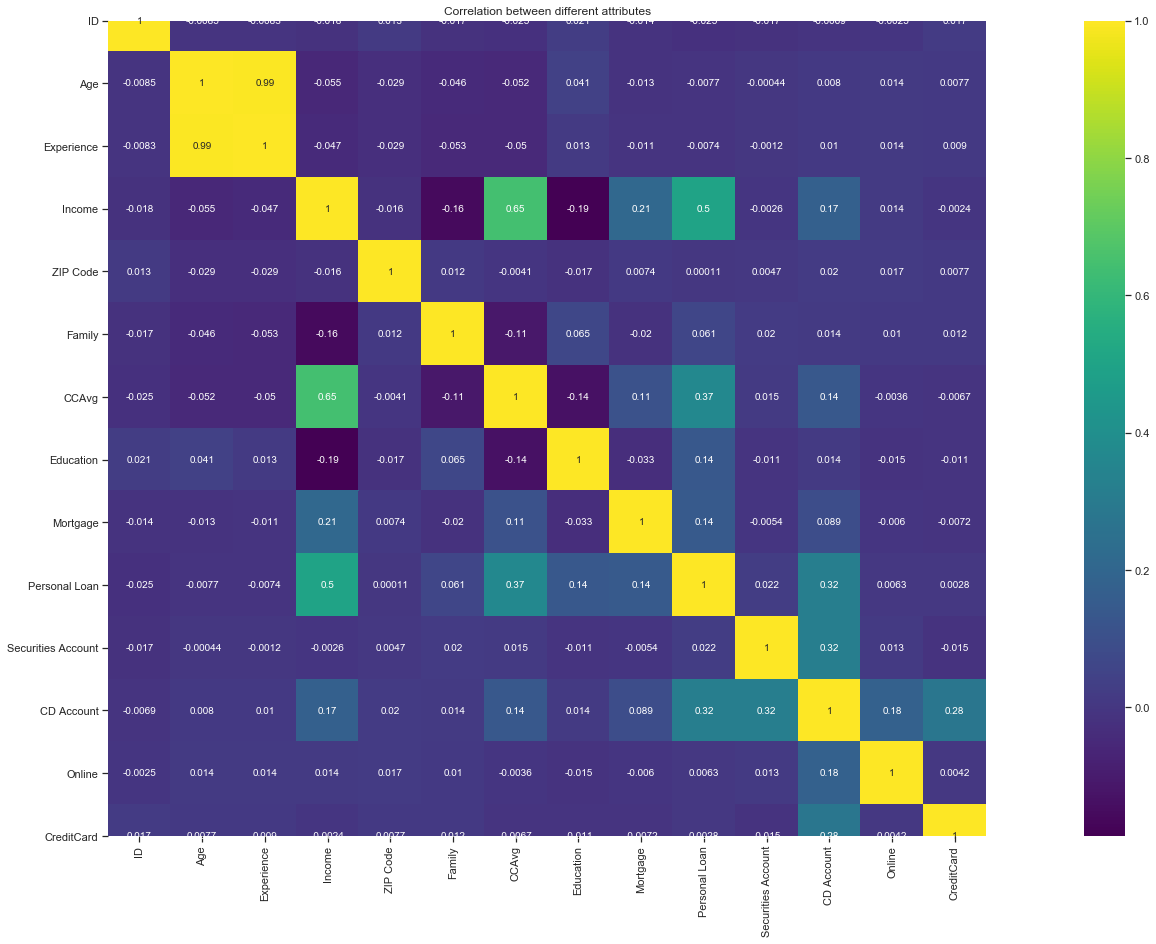

In [25]:
from matplotlib import *
import sys
from pylab import *


plt.figure(figsize=(35,15))

sns.heatmap(df.corr(), vmax=1, square=True, annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()


#### Observation
1. Age and Experoence is highly corelated
2. Income and CCAvg also corelated

In [26]:
#Checking the distibution of Personal Loan


df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

#### Since the number of 0s are highly outweighing the number of 1 it would be good to upsample or downsample the target field. 

## Splitting Data to Train And Test

In [45]:
df1=df
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [48]:
#Dropping "ID", "Experience" and "ZIPCode" columns
#ID and ZIPCode are just numbers od series & Experience is highly correlated with Age


df1 = df1.drop(labels = "Experience", axis = 1)
df1 = df1.drop(labels = "ZIP Code", axis = 1)
df1 = df1.drop(labels = "CCAvg", axis = 1)
X1=df1.drop("Personal Loan",axis=1)                      
y1=df1["Personal Loan"]                                 
X_Train, X_Test, y_Train, y_Test=train_test_split(X1, y1, test_size=0.30, random_state=53)  # Splitting of the data
#train_set, test_set = train_test_split(ds.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [50]:
# Verifying the split of the data

print("{}% data is in training set".format((len(X_Train)/len(df1)) * 100))
print("{}% data is in test set".format((len(X_Test)/len(df1)) * 100))

70.0% data is in training set
30.0% data is in test set


In [55]:
### Using different models for comparison

### Logistic Regression

In [51]:
#Fitting the the model into training dataset
LogReg_model=LogisticRegression(solver="liblinear")
LogReg_model.fit(X_Train,y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
y_predict=LogReg_model.predict(X_Test)
print(confusion_matrix(y_Test, y_predict))

[[1338   14]
 [  69   79]]


In [53]:
print(classification_report(y_Test, y_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1352
           1       0.85      0.53      0.66       148

    accuracy                           0.94      1500
   macro avg       0.90      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [54]:
print(accuracy_score(y_Test, y_predict))

0.9446666666666667


### Naive Bayes

In [56]:
naive_model = GaussianNB()
naive_model.fit(X_Train, y_Train)

prediction = naive_model.predict(X_Test)
naive_model.score(X_Test, y_Test)

0.9153333333333333

In [58]:
cm = pd.DataFrame(confusion_matrix(y_Test, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1295,70
Yes,57,78


### KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors= 21, weights = 'uniform', metric='euclidean')
knn.fit(X_Train, y_Train)    
predicted = knn.predict(X_Test)
acc = accuracy_score(y_Test, predicted)

In [60]:
print(acc)

0.8993333333333333


In [61]:
print(confusion_matrix(y_Test, predicted))

[[1348    4]
 [ 147    1]]


Comparing the results above, it seems that for this dataset, the best result is being produced by the Logistics regression model. 